Dataset Preview:
       TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Checking for null values:
 TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Data types:
 TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

Statistical summary:
                TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


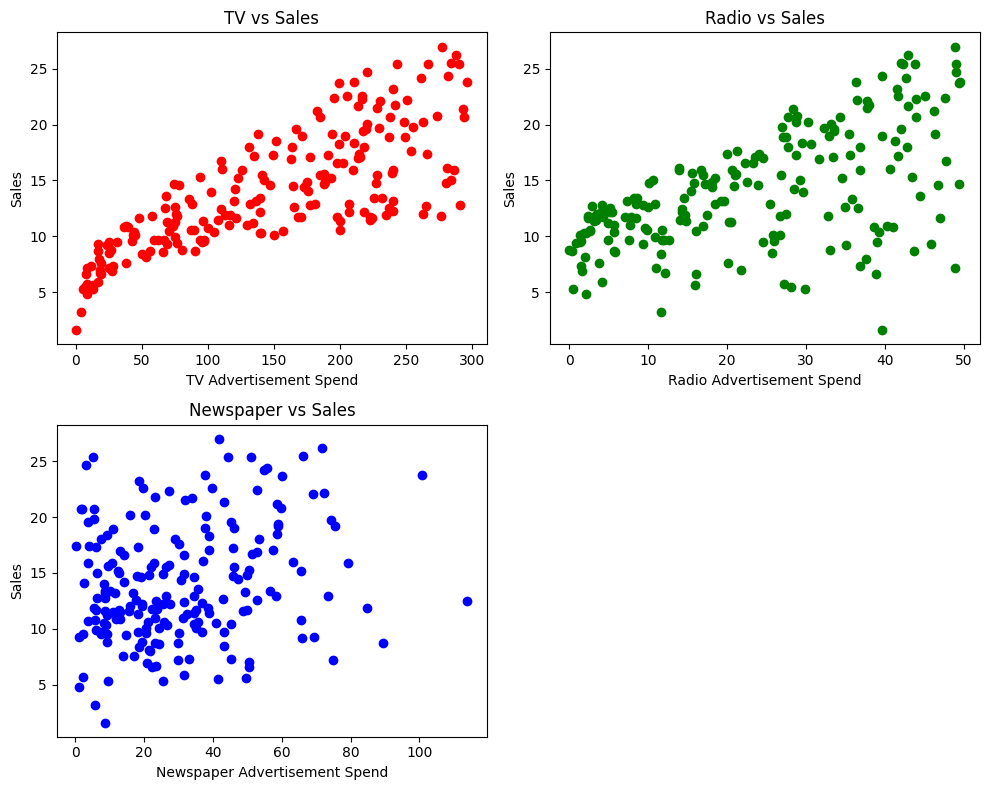


Equation of best-fit line: y = 0.05x + 7.24


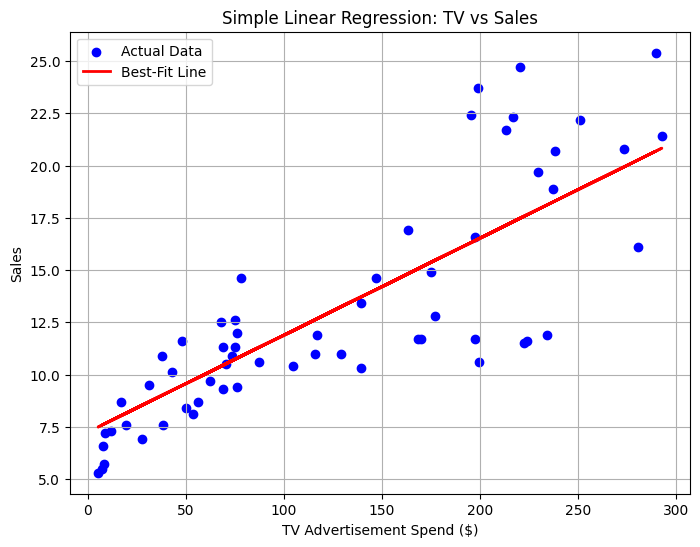

Model Accuracy (R² Score): 0.6714
Root Mean Squared Error (RMSE): 2.9952



Enter TV Advertisement Spend ($):  100


Predicted Sales for $100.0 TV spend: 11.88

--- Inference / Analysis ---
1. The model shows a strong linear relationship between TV spend and sales.
2. R² score of 0.67 indicates that ~67% of variance in sales is explained by TV ad spend.
3. RMSE of 3.00 implies average prediction error in units of sales.
4. Based on visual inspection, the red best-fit line aligns well with the data points.
5. This simple model is useful for predicting expected sales based on new advertisement budgets.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load Dataset
df = pd.read_csv("Advertising.csv")
df = df.drop(columns=["Unnamed: 0"])
print("Dataset Preview:\n", df.head())

# --- Step Preprocessing --- choose any one
print("\nChecking for null values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nStatistical summary:\n", df.describe())

# Step 2: Visualize Feature Relationships
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].scatter(df["TV"], df["sales"], color='red')
axs[0, 0].set_title("TV vs Sales")
axs[0, 0].set_xlabel("TV Advertisement Spend")
axs[0, 0].set_ylabel("Sales")

axs[0, 1].scatter(df["radio"], df["sales"], color='green')
axs[0, 1].set_title("Radio vs Sales")
axs[0, 1].set_xlabel("Radio Advertisement Spend")
axs[0, 1].set_ylabel("Sales")

axs[1, 0].scatter(df["newspaper"], df["sales"], color='blue')
axs[1, 0].set_title("Newspaper vs Sales")
axs[1, 0].set_xlabel("Newspaper Advertisement Spend")
axs[1, 0].set_ylabel("Sales")

axs[1, 1].axis("off")
plt.tight_layout()
plt.show()

# Step 3: Define X and y (using only 'TV' for Simple Linear Regression)
X = df["TV"].values.reshape(-1, 1)
y = df["sales"].values.reshape(-1, 1)

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Extract model parameters
m = model.coef_[0][0]
c = model.intercept_[0]
print(f"\nEquation of best-fit line: y = {m:.2f}x + {c:.2f}")

# Step 6: Predict on Test Data
y_pred = model.predict(X_test)

# Step 7: Visualization - Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Best-Fit Line")
plt.title("Simple Linear Regression: TV vs Sales")
plt.xlabel("TV Advertisement Spend ($)")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Evaluate Model Performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Accuracy (R² Score): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Step 9: Predict for Custom Input
tv_spend = float(input("\nEnter TV Advertisement Spend ($): "))
predicted_sales = model.predict(np.array([[tv_spend]]))
print(f"Predicted Sales for ${tv_spend} TV spend: {predicted_sales[0][0]:.2f}")

# Step 10: Inference / Analysis
print("\n--- Inference / Analysis ---")
print("1. The model shows a strong linear relationship between TV spend and sales.")
print(f"2. R² score of {r2:.2f} indicates that ~{r2*100:.0f}% of variance in sales is explained by TV ad spend.")
print(f"3. RMSE of {rmse:.2f} implies average prediction error in units of sales.")
print("4. Based on visual inspection, the red best-fit line aligns well with the data points.")
print("5. This simple model is useful for predicting expected sales based on new advertisement budgets.")